# Friday meeting 
### [RN] 2/5/2021

## notes from presenting 
Ari said my code looks good and notebook format is good. Data binning will be useful. I can move onto extensions. 
However I should check my diferential solver. He also said lnfit is a better python fitter. 

i will use a well known first order differential equation to to test this method. 

$\frac{dN}{dt}  = -cN$

I will also use the initial conditions in the lab manual 

## working on code 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 8]

### Check my method of ODE solving with simple ODE 

I am pretty sure my method is fine, i doubt the ODE solver library works too differently. I will adjust my method if I have to. 

100 100
-0.29229999999999984
My method of solving the differential and the  known solution have a deviation of  -29.229999999999986


/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5, 1.0, 'Residuals of my ODE solutions with respect to known solution')

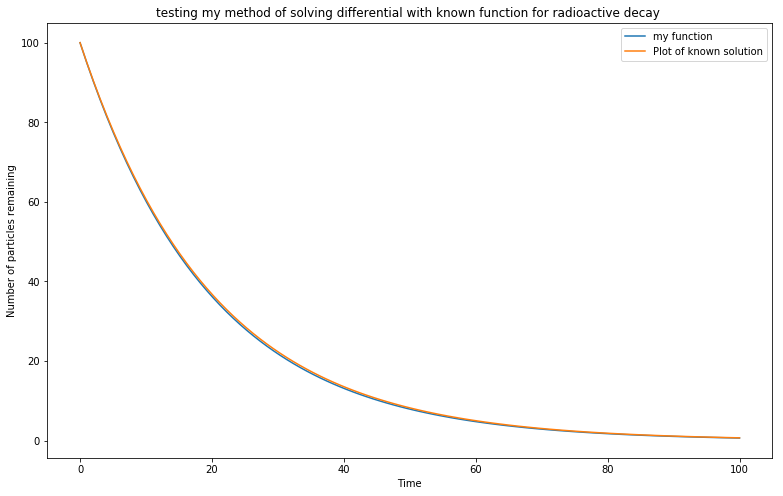

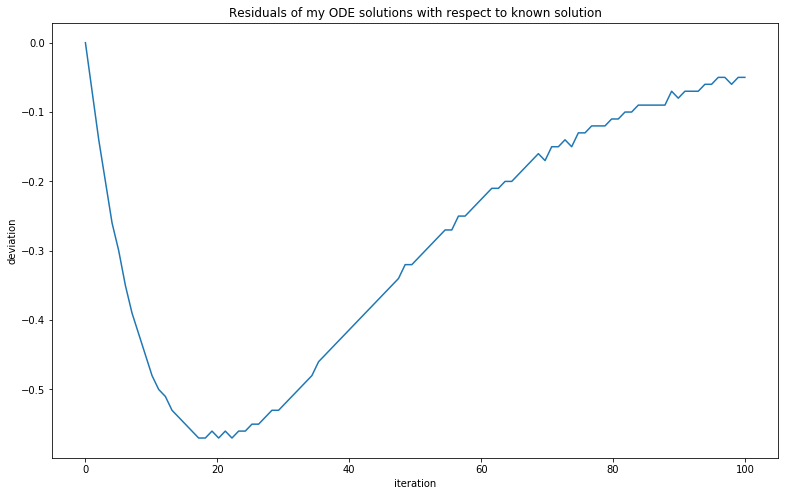

In [12]:
### check differential SIR solver



def SIR(I0, N, k, R0, dt, duration): # from old notebooks 
    g = k/R0
    j = int(duration/dt)
    time_elapsed = 0 # go for duration, iterating by dt
    I, S, R = np.zeros(j), np.zeros(j), np.zeros(j) # i will iterate and fill these in with values 
    R[0] = g*I0 # set initial values as given. 
    I[0] = I0
    S[0] = N-1
    for i in range(1, j): # increment SIR by dt. eg X(t+dt) = X(t) + dX. Log totals in the arrays. 
        dR = g*I[i-1]*dt # get dX values from equation 6
        dI = ((k/N)*S[i-1]*I[i-1]-g*I[i-1])*dt
        dS = -(k/N) * S[i-1]*I[i-1]*dt
        I[i] = I[i-1]+dI  # add increment to last value X(t) to get X(t+dt)
        R[i] = R[i-1]+dR
        S[i] = S[i-1]+dS
    return S, I, R   # return S, I, and R arrays indexed by time. 

# use same method of solving 
def TestFunction(N, dt, duration, c): # test function is radioactive decay, easy first order 
    j = int(duration/dt)
    particles = np.zeros(j)
    particles[0] = N
    for i in range(1, j):
        dN = c*particles[i-1]*dt
        particles[i] = particles[i-1]-dN # use same method I used above 
    return particles

def KnownSolution(N0, c, duration, dt): # easy differential to solve. plot the curve I know it will put out. 
    e = (1+(1/(1000000)))**1000000
    t = np.linspace(0, duration, (duration/dt))
    particles = np.zeros(len(t))
    particles[0] = N0
    for i in range(1, len(t)): 
        particles[i] = N0*e**(-c*t[i])
    return particles

duration = 10
N = 100
c = 0.5
dt = 0.1
particles = TestFunction(N, dt, duration, c)
known = KnownSolution(N, c, duration, dt)

# plot to see differences 
fig1, axs1 = plt.subplots()
test_x = np.linspace(0, max(particles), len(particles))
axs1.plot(test_x, particles, label = "my function")
test_x = np.linspace(0, max(known), len(known))
axs1.plot(test_x, known, label = "Plot of known solution")
plt.legend()
plt.title("testing my method of solving differential with known function for radioactive decay ")
plt.xlabel("Time")
plt.ylabel("Number of particles remaining")
fig1.show()

# analytically check for differences 
Deviation = 0
residuals = []
print(len(particles), len(known))
for i in range(len(particles)): 
    difference = round(particles[i], 2) - round(known[i], 2)
    residuals.append(difference)
    #if difference > 1:
    #print("index: ", i, "difference:", difference, round(particles[i], 2), round(known[i], 2))
    Deviation = Deviation + difference

print(Deviation/len(known))

print("My method of solving the differential and the  known solution have a deviation of ", Deviation)


# plot differences 
fig2, axs2 = plt.subplots()
index = np.linspace(0, len(residuals), len(residuals))
axs2.plot(index, residuals)
plt.xlabel("iteration")
plt.ylabel("deviation")
plt.title("Residuals of my ODE solutions with respect to known solution")

### using initial conditions in lab manial, part III 

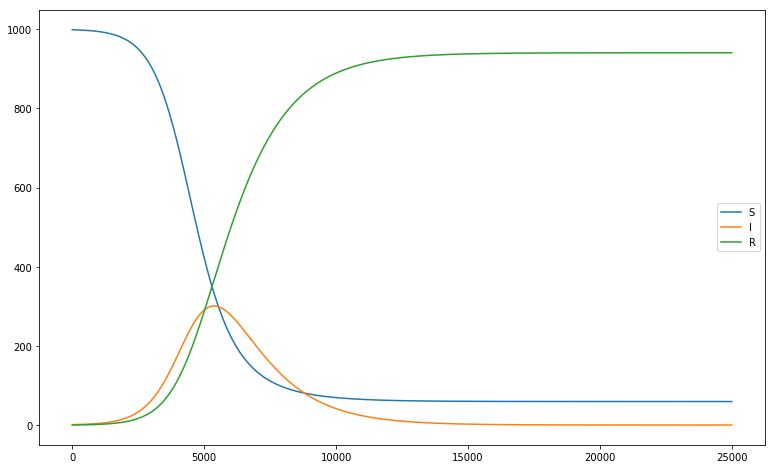

In [13]:
### test with given initial conditions 

def SIR_noR0(I0, N, k, g, dt, duration):
    j = int(duration/dt)
    time_elapsed = 0 # go for duration, iterating by dt
    I, S, R = np.zeros(j), np.zeros(j), np.zeros(j) # i will iterate and fill these in with values 
    R[0] = g*I0 # set initial values as given. 
    I[0] = I0
    S[0] = N-1
    for i in range(1, j): # increment SIR by dt. eg X(t+dt) = X(t) + dX. Log totals in the arrays. 
        dR = g*I[i-1]*dt # get dX values from equation 6
        dI = ((k/N)*S[i-1]*I[i-1]-g*I[i-1])*dt
        dS = -(k/N) * S[i-1]*I[i-1]*dt
        I[i] = I[i-1]+dI  # add increment to last value X(t) to get X(t+dt)
        R[i] = R[i-1]+dR
        S[i] = S[i-1]+dS
    return S, I, R   # return S, I, and R arrays indexed by time.

S, I ,R = SIR_noR0(1, 1000, 3/14, 1/14, 0.01, 250)
time = np.linspace(0, len(S), len(S))

plt.plot(time, S, label = "S")
plt.plot(time, I, label = "I")
plt.plot(time, R, label = "R")
plt.legend()

### [RN] 4:18 pm 

My differential solver seems to solve the ODE fine. It gives a similar plot to the one in the notebook using the same initial conditions, and solves the radioactive decay well. It does seem to have some degree of sensitivity to timestep. 

Ill probably benefit to write a function to compare affect of timestep. Ill do that now. 

### Looking at effect of timestep 

/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0, 0.5, 'Percent Difference ')

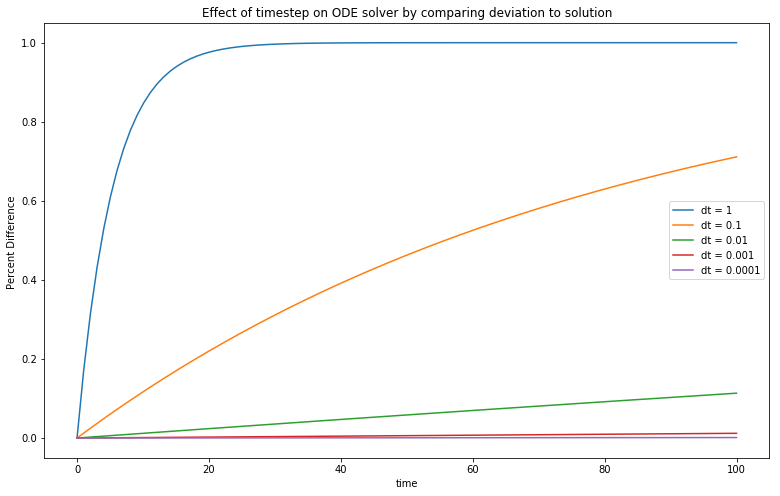

In [14]:
### compare effect of timestep 

dt = [1, 0.1, 0.01, 0.001, 0.0001]

def Deviation(known, data):
    residuals = []
    for i in range(len(known)):
        difference = abs(known[i] - data[i])
        residuals.append(difference/known[i]) # divide by true value to get a better idea of how big the difference is compared to value
    return residuals

N0 = 100
duration = 100
c = 0.5
fig3, axs3 = plt.subplots()
for i in range(len(dt)):
    N = TestFunction(N0, dt[i], duration, c)
    known = KnownSolution(N0, c, duration, dt[i])
    time = np.linspace(0, len(N), len(N))
    dS = Deviation(known, N)
    x = np.linspace(0, int(len(dS)*dt[i]), len(dS))
    axs3.plot(x, dS, label = "dt = "+str(dt[i]))

plt.legend()
plt.title("Effect of timestep on ODE solver by comparing deviation to solution")
plt.xlabel("time")
plt.ylabel("Percent Difference ")

It looks like the sensitivity to time step, at least for the radioactive decay, is important. I will keep this in mind while doing my extension. The timestep of 1ms, or 0.001 per unit time looks adequate. For this plot, I used percent difference to account for the fact that the values get much smaller over time: 

% difference  = $\frac{abs(known - model)}{known}$

The deviation seems acceptable as long as I use an appropriate time step. I will keep this analysis in mind when I decide how to deal with error. 